In [1]:
import Pkg
Pkg.activate("../../../FinancialPlanner")

  Activating project at `c:\Users\matsz\programowanie\Optymalizacja_portfela\FinancialPlanner`


In [2]:
using Revise
using LinearAlgebra
using Distributions
using Random
using StatsPlots
using PDMats
using StatsBase
using Base.Iterators
using DataFrames, TimeSeries, XLSX
using PrettyTables

In [3]:
includet("../VARs/utils.jl")
includet("../VARs/VAR_OLS.jl")

In [38]:
df = DataFrame(XLSX.readtable("../../data/usa_macro_data.xlsx", "Quarterly", infer_eltypes=true))
data_source = collapse(TimeArray(df; timestamp = :observation_date), Dates.year, first)

display(returns_summarystats(data_source, 1)) 

,std,max,mean,p75th,min,skewness,p25th,autocor,kurtosis,sr,median
A939RX0Q048SBEA,14838.8,67981.0,40071.6,53710.0,18032.0,0.1487,27121.5,0.9563,-1.2441,2.7005,39549.5
GDPDEF,32.924,124.163,56.7996,84.971,13.675,0.1863,22.07,0.9554,-1.2062,1.7252,57.425
TB3MS,3.1828,14.39,4.2329,5.715,0.03,0.9527,1.83,0.8685,1.1797,1.3299,4.14
GS10,2.9018,14.29,5.5779,7.3375,1.32,0.9058,3.6525,0.9254,0.4925,1.9222,4.875
Price_10Y,1702.69,5318.51,1614.35,2728.29,111.433,0.8088,182.823,0.968,-0.85,0.9481,754.307
Stock_Price,1152.53,5011.96,878.65,1298.47,36.79,1.8412,94.365,0.8845,2.9751,0.7624,312.225
Dividend,18.1203,70.6511,16.8296,22.4625,1.5533,1.4839,3.1642,0.9247,1.2524,0.9288,10.5633
E,47.2349,197.883,40.1674,57.9025,2.8333,1.6449,5.9717,0.8601,2.19,0.8504,17.21
CAPE,8.1444,42.1856,21.0209,26.6211,7.1818,0.4211,15.8277,0.9012,-0.3,2.581,20.674
USACPIALLQINMEI,35.8054,130.944,55.1616,85.458,11.265,0.2918,17.5866,0.9546,-1.1771,1.5406,52.6755


nothing

In [39]:
freq = 1

cpi = percentchange(data_source[:USACPIALLQINMEI], :log) .* 100
nominal_gdp = percentchange(data_source[:NGDPSAXDCUSQ], :log) .* 100 
gdp = nominal_gdp .- cpi

sr = (data_source[:TB3MS]) .- cpi
term = (data_source[:GS10]) .- (data_source[:TB3MS])
Δd = round.(percentchange(data_source[:Dividend], :log) .* 100, digits=2) .- cpi

dy = round.((log.(data_source[:Dividend]) .- log.(data_source[:Stock_Price])), digits=2)

data= merge(gdp, cpi, sr, term, Δd, dy)

start = Date(1985, 01,01)
end_d = Date(2024, 12, 31)
s_data = to(from(data, start),end_d)

display(returns_summarystats(s_data, freq)) 
display(cor(values(s_data)))



,std,max,mean,p75th,min,skewness,p25th,autocor,kurtosis,sr,median
NGDPSAXDCUSQ_USACPIALLQINMEI,1.5916,4.9744,2.2035,3.1259,-2.4211,-0.8217,1.6484,0.3595,1.1406,1.3845,2.2274
USACPIALLQINMEI,1.4714,7.6653,2.7745,3.2265,-0.0627,0.919,1.8528,0.3868,1.9097,1.8856,2.7396
TB3MS_USACPIALLQINMEI,2.3673,4.6585,0.4475,2.2531,-7.3553,-0.6496,-1.0958,0.5882,1.1485,0.189,0.6155
GS10_TB3MS,1.224,3.61,1.6328,2.7025,-1.07,-0.2468,0.6675,0.491,-0.5856,1.3339,1.655
Dividend_USACPIALLQINMEI,6.5797,14.6122,2.9522,7.0865,-24.8231,-1.7298,-0.2485,0.4301,6.1945,0.4487,2.8989
Dividend_Stock_Price,0.3321,-3.17,-3.8705,-3.5925,-4.42,0.3718,-4.1,0.7846,-0.8387,-11.6556,-3.925


nothing

6×6 Matrix{Float64}:
  1.0        -0.0786054   0.288259   -0.0434402   0.262786   -0.161539
 -0.0786054   1.0        -0.133999   -0.227563   -0.0864749   0.101584
  0.288259   -0.133999    1.0        -0.228599    0.0530847   0.374547
 -0.0434402  -0.227563   -0.228599    1.0        -0.276802    0.372277
  0.262786   -0.0864749   0.0530847  -0.276802    1.0         0.0551805
 -0.161539    0.101584    0.374547    0.372277    0.0551805   1.0

In [15]:
s_data

40×6 TimeArray{Float64, 2, Date, Matrix{Float64}} 1985-01-01 to 2024-01-01
┌────────────┬──────────────────────────────┬─────────────────┬─────────────────
│            │ NGDPSAXDCUSQ_USACPIALLQINMEI │ USACPIALLQINMEI │ TB3MS_USACPIAL ⋯
├────────────┼──────────────────────────────┼─────────────────┼─────────────────
│ 1985-01-01 │                      4.39872 │          3.5215 │                ⋯
│ 1986-01-01 │                      3.32267 │         3.03617 │                ⋯
│ 1987-01-01 │                      2.47021 │         2.17333 │                ⋯
│ 1988-01-01 │                      3.27952 │          3.8945 │                ⋯
│ 1989-01-01 │                       3.5666 │         4.71203 │                ⋯
│ 1990-01-01 │                       1.2517 │         5.10057 │                ⋯
│ 1991-01-01 │                     -2.42109 │         5.15016 │              0 ⋯
│ 1992-01-01 │                        2.463 │         2.82806 │                ⋯
│     ⋮      │              ⋮     

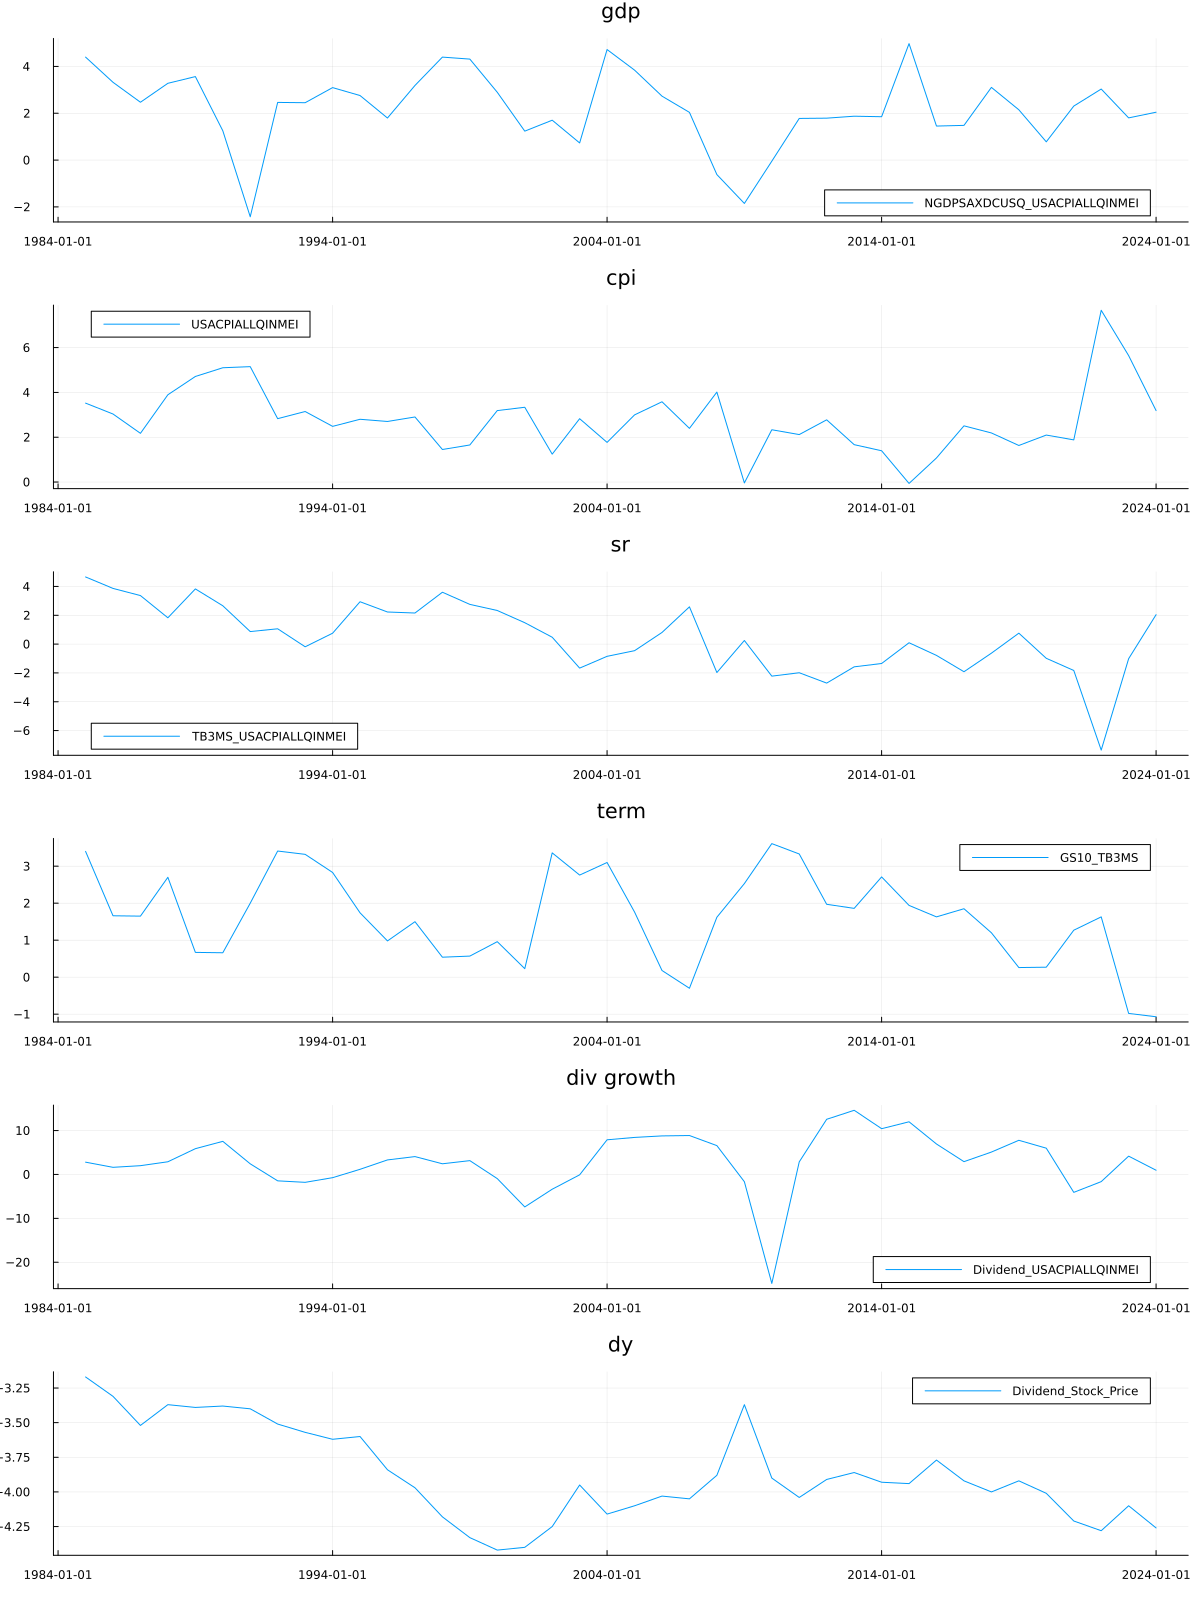

In [16]:
plot(s_data; layout = (6,1), size=(1200,1600), title=["gdp" "cpi" "sr" "term" "div growth" "dy"])

In [40]:
assets_names = colnames(s_data)
T, n_assets = size(s_data)
model = VARModel(s_data)
model_summary(model)

,const,NGDPSAXDCUSQ_USACPIALLQINMEI,USACPIALLQINMEI,TB3MS_USACPIALLQINMEI,GS10_TB3MS,Dividend_USACPIALLQINMEI,Dividend_Stock_Price,std
NGDPSAXDCUSQ_USACPIALLQINMEI,-1.2875,0.3677,-0.0348,0.0091,0.41,-0.016,-0.5351,1.4712
USACPIALLQINMEI,7.3763,0.3554,0.2643,-0.1127,-0.3679,-0.078,1.3546,1.3478
TB3MS_USACPIALLQINMEI,-3.5188,0.2749,0.7531,0.6361,0.3487,0.0439,-0.0482,1.4952
GS10_TB3MS,1.1137,-0.4749,-0.1879,0.1655,0.5667,-0.0021,-0.2632,0.6918
Dividend_USACPIALLQINMEI,-15.6073,1.4947,0.8908,-0.5304,1.3719,0.4452,-2.4207,5.454
Dividend_Stock_Price,-1.6583,-0.0057,0.0497,0.014,0.0728,0.0099,0.6512,0.1564


,NGDPSAXDCUSQ_USACPIALLQINMEI,USACPIALLQINMEI,TB3MS_USACPIALLQINMEI,GS10_TB3MS,Dividend_USACPIALLQINMEI,Dividend_Stock_Price
NGDPSAXDCUSQ_USACPIALLQINMEI,1.0,-0.17,0.35,-0.13,0.19,-0.56
USACPIALLQINMEI,-0.17,1.0,-0.75,0.01,-0.16,0.0
TB3MS_USACPIALLQINMEI,0.35,-0.75,1.0,-0.35,-0.02,-0.19
GS10_TB3MS,-0.13,0.01,-0.35,1.0,0.09,0.35
Dividend_USACPIALLQINMEI,0.19,-0.16,-0.02,0.09,1.0,0.18
Dividend_Stock_Price,-0.56,0.0,-0.19,0.35,0.18,1.0


In [68]:
#unconditional mean
c = model.C[1,:]
Β = model.C[2:end,:]

uμ = inv(I(6) - B) * c



6-element Vector{Float64}:
  2.0873618035124233
  2.587670718567299
 -0.43223457984167624
  1.4363566902451423
  3.2631935277769166
 -4.045416816596298

In [42]:
scenarios = simulate(model, 25*freq, 10_000)
#periods = [2,6, 16, 26]
periods = [1,5, 15, 25]
ret_in_years = cum_returns_in_periods(scenarios, periods, freq, true)
print_scenarios_summary(ret_in_years, assets_names, string.(periods))

for a in 1:n_assets
    print_scenarios_percentiles(ret_in_years[a, :, :], [.01, 0.025, .05, .25, .5, .75, .95, .975, .99], string.(periods), string.(assets_names[a]))
end  

,NGDPSAXDCUSQ_USACPIALLQINMEI,USACPIALLQINMEI,TB3MS_USACPIALLQINMEI,GS10_TB3MS,Dividend_USACPIALLQINMEI,Dividend_Stock_Price
1,2.0446,3.1896,2.0404,-1.07,0.9604,-4.26
5,1.8412,2.7681,0.3011,0.8528,0.5368,-4.2599
15,2.0428,2.5991,-0.2557,1.227,2.6047,-4.1371
25,2.0599,2.5941,-0.3356,1.3076,2.8778,-4.1022


,NGDPSAXDCUSQ_USACPIALLQINMEI,USACPIALLQINMEI,TB3MS_USACPIALLQINMEI,GS10_TB3MS,Dividend_USACPIALLQINMEI,Dividend_Stock_Price
1,0.0,0.0,0.0,0.0,0.0,0.0
5,0.7573,0.771,0.8736,0.6035,3.3635,0.1451
15,0.4842,0.5289,0.7444,0.4122,2.2452,0.1587
25,0.3821,0.4295,0.6278,0.3327,1.77,0.1416


,NGDPSAXDCUSQ_USACPIALLQINMEI,USACPIALLQINMEI,TB3MS_USACPIALLQINMEI,GS10_TB3MS,Dividend_USACPIALLQINMEI,Dividend_Stock_Price
1,-1.0,-1.0,1.0,1.0,1.0,1.0
5,-0.029,-0.0172,0.0087,-0.0154,-0.0051,0.0204
15,-0.0151,0.0212,-0.0007,-0.0015,-0.0693,0.0341
25,-0.0018,0.0131,-0.0086,0.0266,-0.0156,0.0129


,NGDPSAXDCUSQ_USACPIALLQINMEI,USACPIALLQINMEI,TB3MS_USACPIALLQINMEI,GS10_TB3MS,Dividend_USACPIALLQINMEI,Dividend_Stock_Price
1,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0
5,-0.0133,0.0513,0.0371,-0.0039,0.0303,0.0345
15,0.0054,-0.0142,-0.0087,-0.0488,-0.0296,0.0098
25,0.003,-0.0074,0.1158,-0.0665,-0.0813,-0.0383


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,2.0446,2.0446,2.0446,2.0446,2.0446,2.0446,2.0446,2.0446,2.0446
5,0.0669,0.3548,0.5893,1.3287,1.8421,2.362,3.0791,3.3148,3.5904
15,0.9144,1.0865,1.2507,1.7124,2.0425,2.372,2.8361,2.9825,3.1698
25,1.1785,1.3151,1.43,1.8068,2.0576,2.3173,2.6932,2.815,2.9635


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,3.1896,3.1896,3.1896,3.1896,3.1896,3.1896,3.1896,3.1896,3.1896
5,0.9565,1.2295,1.512,2.2416,2.7637,3.2958,4.0257,4.2666,4.5559
15,1.3764,1.5578,1.7315,2.2458,2.5977,2.9517,3.4659,3.6417,3.8387
25,1.6012,1.7491,1.881,2.3043,2.5929,2.8849,3.3019,3.447,3.6054


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,2.0404,2.0404,2.0404,2.0404,2.0404,2.0404,2.0404,2.0404,2.0404
5,-1.748,-1.395,-1.1424,-0.2793,0.2932,0.8774,1.7271,2.0203,2.3478
15,-1.9881,-1.7267,-1.4745,-0.7614,-0.2564,0.254,0.9414,1.2078,1.4652
25,-1.7915,-1.5578,-1.3556,-0.7503,-0.3302,0.0887,0.6797,0.9028,1.1657


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,-1.07,-1.07,-1.07,-1.07,-1.07,-1.07,-1.07,-1.07,-1.07
5,-0.5686,-0.3253,-0.1422,0.4474,0.8548,1.2559,1.8422,2.0285,2.2616
15,0.274,0.4263,0.5533,0.9469,1.2235,1.5091,1.9023,2.027,2.1738
25,0.551,0.6637,0.7707,1.0796,1.3073,1.5345,1.8576,1.9645,2.0927


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,0.9604,0.9604,0.9604,0.9604,0.9604,0.9604,0.9604,0.9604,0.9604
5,-7.245,-5.9796,-5.0336,-1.7457,0.5738,2.7921,6.071,7.1155,8.2527
15,-2.6491,-1.8134,-1.1564,1.0747,2.6336,4.1238,6.2653,6.9912,7.6076
25,-1.1968,-0.587,-0.0594,1.7008,2.8815,4.0846,5.7874,6.3474,6.9553


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,-4.26,-4.26,-4.26,-4.26,-4.26,-4.26,-4.26,-4.26,-4.26
5,-4.5955,-4.5465,-4.498,-4.3584,-4.2601,-4.1625,-4.0194,-3.9738,-3.9231
15,-4.5012,-4.4455,-4.3968,-4.2449,-4.1385,-4.0294,-3.8788,-3.8181,-3.7659
25,-4.4336,-4.3793,-4.3334,-4.198,-4.1033,-4.0058,-3.8675,-3.8237,-3.7728


In [43]:
sr = scenarios[2, :,:] + scenarios[3, :,:] 
lr = scenarios[2, :,:] + scenarios[3, :,:] + scenarios[4, :,:] 
real_Δd = scenarios[2, :,:] + scenarios[5, :,:]
dy = exp.(scenarios[6, :,:])



print_scenarios_percentiles(sr[periods, :], [.01, 0.025, .05, .25, .5, .75, .95, .975, .99], string.(periods), "sr")
print_scenarios_percentiles(lr[periods, :], [.01, 0.025, .05, .25, .5, .75, .95, .975, .99], string.(periods), "lr")
print_scenarios_percentiles(cumsum(real_Δd, dims=1)[periods,:] ./ (periods.-1), [.01, 0.025, .05, .25, .5, .75, .95, .975, .99], string.(periods), "Δd")
print_scenarios_percentiles(dy[periods, :], [.01, 0.025, .05, .25, .5, .75, .95, .975, .99], string.(periods), "dy")



,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,5.23,5.23,5.23,5.23,5.23,5.23,5.23,5.23,5.23
5,-3.1061,-2.3838,-1.7001,0.3473,1.7151,3.1198,5.2125,5.8692,6.5178
15,-3.0511,-2.2406,-1.4912,0.6576,2.1297,3.5478,5.6224,6.3219,7.1248
25,-2.7889,-2.0714,-1.45,0.6565,2.1446,3.6364,5.8107,6.5554,7.2735


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,4.16,4.16,4.16,4.16,4.16,4.16,4.16,4.16,4.16
5,-0.0114,0.5933,1.0468,2.4529,3.4454,4.4443,5.9046,6.402,6.9478
15,-0.4429,0.2686,0.8144,2.397,3.5004,4.5983,6.2267,6.7512,7.3483
25,-0.3234,0.3319,0.8259,2.4314,3.5447,4.6748,6.377,6.9005,7.5748


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,Inf,Inf,Inf,Inf,Inf,Inf,Inf,Inf,Inf
5,-5.494,-4.1225,-2.8133,1.3118,4.1904,6.94,10.9458,12.279,13.8741
15,0.1968,1.0248,1.8006,3.9991,5.578,7.1677,9.3668,10.0324,10.7396
25,1.6385,2.2747,2.7915,4.5031,5.7073,6.9051,8.5689,9.1159,9.658


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,0.0141,0.0141,0.0141,0.0141,0.0141,0.0141,0.0141,0.0141,0.0141
5,0.0082,0.009,0.0099,0.0128,0.0153,0.0183,0.024,0.026,0.0285
15,0.0088,0.0098,0.0107,0.0144,0.0174,0.0211,0.0281,0.0303,0.0335
25,0.0088,0.0099,0.0109,0.0143,0.0174,0.0212,0.0281,0.031,0.0343


In [47]:
real_Δd[1,:] .= 1.

div_index =values(data_source[:Dividend][end])[1] .* exp.(cumsum(real_Δd, dims=1) ./100)

price_index = div_index ./ dy
periods = [1, 5, 10, 25] * freq

eq_ret = log.((price_index[2:end,:] .+ div_index[2:end,:] ) ./ price_index[1:end-1,:])
eq_cum_ret = cumsum(eq_ret, dims=1)[periods,:] ./ periods
real_eq_ret = eq_ret .- (scenarios[2, 2:end, :] ./100)
real_eq_cum_ret = cumsum(real_eq_ret, dims=1)[periods,:] ./ periods

print_scenarios_percentiles(eq_cum_ret, [.01, 0.025, .05, .25, .5, .75, .95, .975, .99], string.([1, 5, 10, 25]), "equity return")
print_scenarios_percentiles(real_eq_cum_ret, [.01, 0.025, .05, .25, .5, .75, .95, .975, .99], string.([1, 5, 10, 25]), "equity real return") 

,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,-0.2555,-0.199,-0.1553,-0.0086,0.0916,0.1976,0.3475,0.3962,0.4491
5,-0.1049,-0.0854,-0.0654,-0.011,0.0273,0.0637,0.1186,0.1357,0.1551
10,-0.0324,-0.02,-0.0093,0.0233,0.0471,0.0701,0.1041,0.1141,0.1257
25,0.0196,0.0266,0.0325,0.0513,0.0645,0.0772,0.0955,0.1016,0.1088


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,-0.2846,-0.2355,-0.1896,-0.0403,0.0602,0.1653,0.3171,0.3645,0.4159
5,-0.1323,-0.1128,-0.0933,-0.0371,0.0009,0.0387,0.0944,0.1115,0.1308
10,-0.0618,-0.0495,-0.0375,-0.003,0.0217,0.046,0.0803,0.092,0.1048
25,-0.0086,-0.001,0.0053,0.0248,0.0386,0.0521,0.0719,0.078,0.0851


In [48]:
mdd, mddl = max_drawdown_and_length(real_eq_ret)

display("real equity")
display("mdd")
display(quantile(mdd, [.05, .25, .5, .75, .95])')
display("mddl")
display(quantile(mddl, [.05, .25, .5, .75, .95])')

"real equity"

"mdd"

1×5 adjoint(::Vector{Float64}) with eltype Float64:
 0.232073  0.321453  0.395783  0.474031  0.589038

"mddl"

1×5 adjoint(::Vector{Float64}) with eltype Float64:
 5.0  7.0  9.0  12.0  19.0

In [49]:
eq_return = calculate_equity_returns(real_Δd, scenarios[6, :,:])
eq_cum_return = cumsum(eq_return, dims=1)[periods,:] ./ periods

print_scenarios_percentiles(eq_cum_return, [.01, 0.025, .05, .25, .5, .75, .95, .975, .99], string.([1, 5, 10, 25]), "equity return")

,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,-0.2555,-0.199,-0.1553,-0.0086,0.0916,0.1976,0.3475,0.3962,0.4491
5,-0.1049,-0.0854,-0.0654,-0.011,0.0273,0.0637,0.1186,0.1357,0.1551
10,-0.0324,-0.02,-0.0093,0.0233,0.0471,0.0701,0.1041,0.1141,0.1257
25,0.0196,0.0266,0.0325,0.0513,0.0645,0.0772,0.0955,0.1016,0.1088


In [50]:
percentile(eq_return[1,:], [.25, .5, .75])

3-element Vector{Float64}:
 -0.3238933410683424
 -0.28401870793699324
 -0.2674843219633964

In [51]:
bond_returns = calculate_bond_returns(lr./100, 10, 1)
bond_cum_returns = cumsum(bond_returns, dims=1)[periods,:] ./ periods

real_bond_returns = bond_returns .- (scenarios[2, 2:end, :] ./100)
real_bond_cum_returns = cumsum(real_bond_returns, dims=1)[periods,:] ./ periods

print_scenarios_percentiles(bond_cum_returns, [.01, 0.025, .05, .25, .5, .75, .95, .975, .99], string.([1, 5, 10, 25]), "bonds returns")
print_scenarios_percentiles(real_bond_cum_returns, [.01, 0.025, .05, .25, .5, .75, .95, .975, .99], string.([1, 5, 10, 25]), "real bonds returns")


mdd, mddl = max_drawdown_and_length(real_bond_returns)

display("real bonds")
display("mdd")
display(quantile(mdd, [.05, .25, .5, .75, .95])')
display("mddl")
display(quantile(mddl, [.05, .25, .5, .75, .95])')


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,-0.1082,-0.0868,-0.0686,-0.0093,0.0345,0.0799,0.1492,0.1713,0.202
5,0.0113,0.0174,0.0227,0.0402,0.0529,0.0668,0.0888,0.0966,0.1052
10,0.0197,0.0234,0.0266,0.0364,0.0437,0.0517,0.0636,0.0678,0.0723
25,0.0209,0.024,0.0263,0.034,0.0392,0.0447,0.0527,0.0552,0.0582


,0.01,0.025,0.05,0.25,0.5,0.75,0.95,0.975,0.99
1,-0.1545,-0.1283,-0.1082,-0.0453,0.0014,0.0507,0.1254,0.1482,0.1808
5,-0.0272,-0.0185,-0.0124,0.0105,0.0269,0.0442,0.0712,0.0805,0.091
10,-0.011,-0.0065,-0.0029,0.0094,0.0184,0.0276,0.042,0.0469,0.0517
25,-0.0037,-0.0012,0.0012,0.0085,0.0136,0.0187,0.0263,0.0289,0.0317


"real bonds"

"mdd"

1×5 adjoint(::Vector{Float64}) with eltype Float64:
 0.144864  0.207466  0.263253  0.327301  0.427862

"mddl"

1×5 adjoint(::Vector{Float64}) with eltype Float64:
 6.0  8.0  11.0  15.0  20.0

In [52]:
B = collect(model.C[2:end,:]')

resp = girf(B, model.Σ, 10, 6, 1)



11×6 Matrix{Float64}:
 -0.821879      0.00143331  -0.28467     0.243311    0.986343   0.156389
 -0.304554     -0.214242    -0.285339    0.437625   -0.681931   0.130048
  0.0136006    -0.0643425   -0.310179    0.352882   -0.512731   0.0969218
  0.105432      0.0642467   -0.146156    0.129841    0.148783   0.0761379
  0.0453229     0.11468      0.0325327  -0.0330994   0.352397   0.0610475
 -0.0388948     0.110129     0.120508   -0.0732511   0.116334   0.0467108
 -0.0739245     0.0828481    0.126221   -0.0363302  -0.185726   0.0336055
 -0.0588284     0.0547723    0.0999263   0.0113795  -0.317505   0.0237037
 -0.025575      0.0349947    0.0775344   0.0350529  -0.275243   0.0175812
 -0.000555861   0.0238095    0.0679416   0.034211   -0.165169   0.0142502
  0.00862447    0.0180371    0.0649916   0.0230143  -0.0767409  0.0122739

In [53]:
resp[2,2] + resp[2,3]  + resp[2,4]

-0.06195632843616011

gdp + 
- sr .42
- lr .25

gdp -
- sr - .42
- lr - .25

cpi +
- sr .09
- lr .2


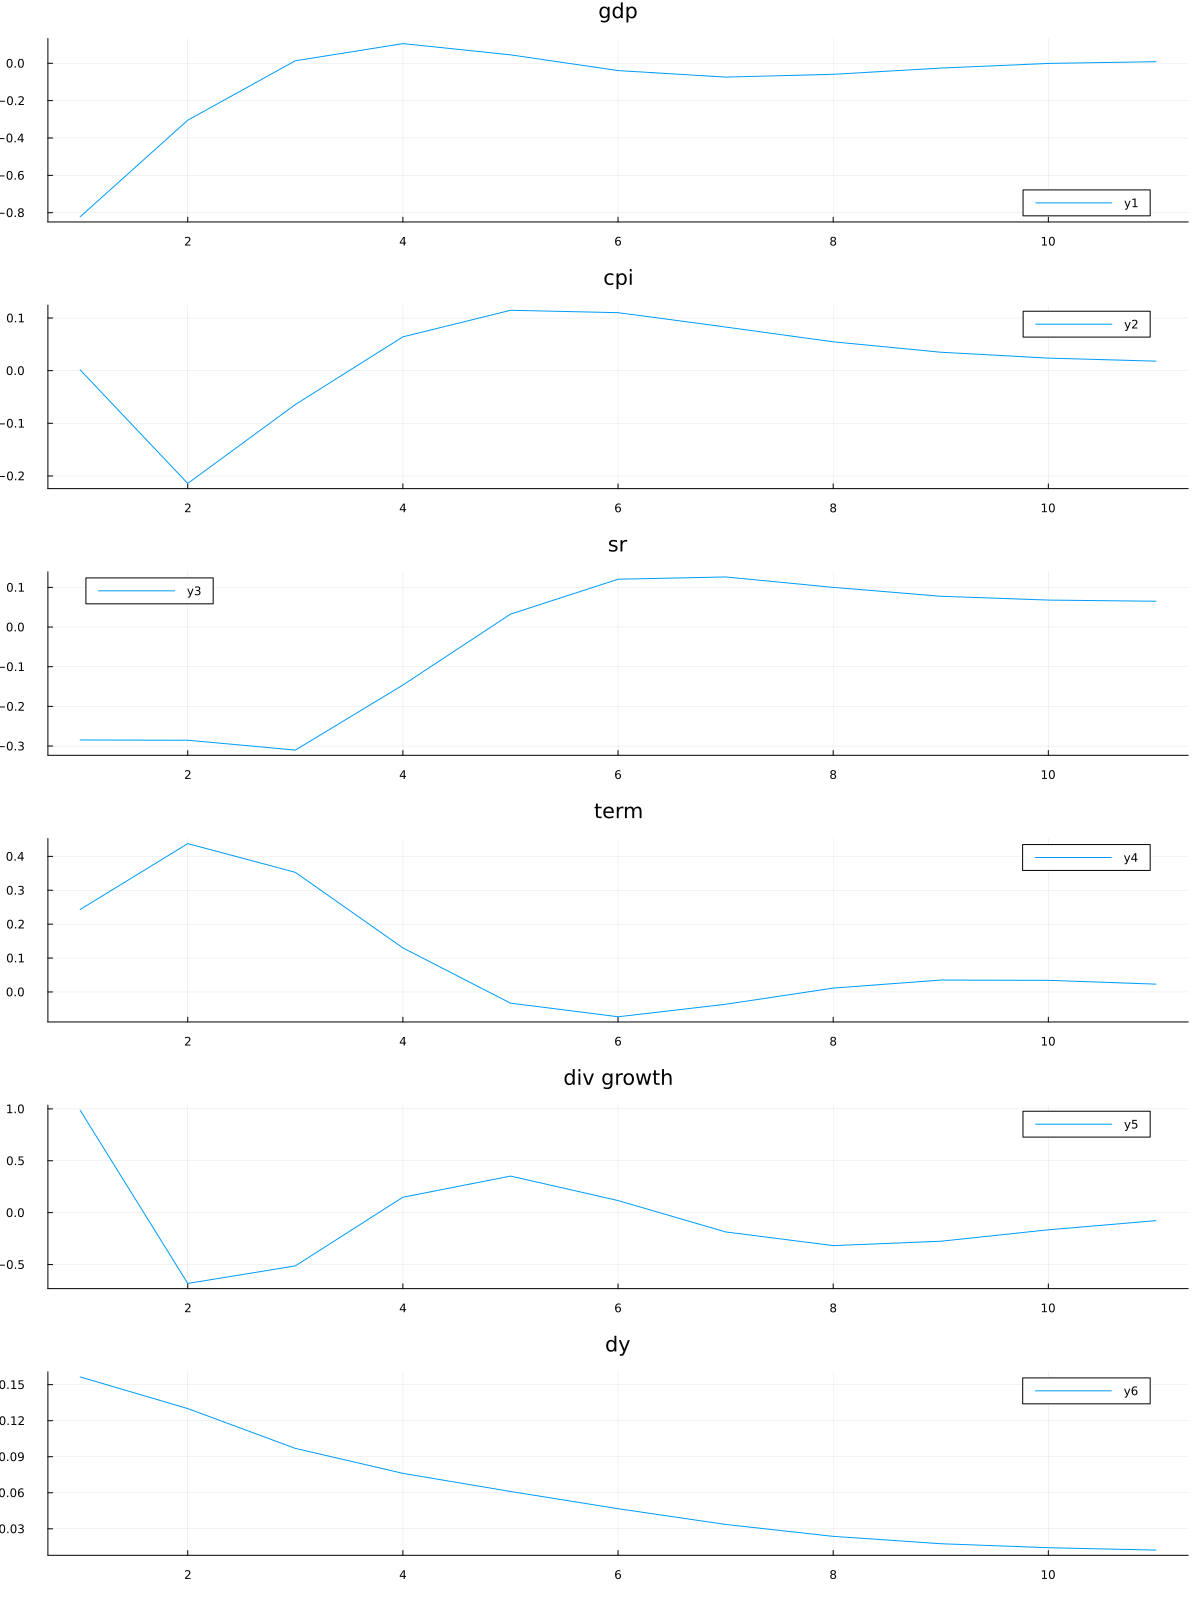

In [54]:
plot(resp; layout = (6,1), size=(1200,1600), title=["gdp" "cpi" "sr" "term" "div growth" "dy"])

In [55]:
display(exp(-3.8 ) *100) 
display(exp(-3.8 + 0.08)*100) 
display((exp(-3.8 ) - exp(-3.8 + 0.08))*100) 
display(0.0224*exp((0.06^2)-1)^.5 *100)
display(exp(-4.8 ) *100) 

2.23707718561656

2.4233967845691122

-0.1863195989525522

1.3610764116758998

0.822974704902003

IRF returns
- estimate dy, and div idnex, based on initial value, mean?
- estimate returns?
- 

In [56]:
resp

11×6 Matrix{Float64}:
 -0.821879      0.00143331  -0.28467     0.243311    0.986343   0.156389
 -0.304554     -0.214242    -0.285339    0.437625   -0.681931   0.130048
  0.0136006    -0.0643425   -0.310179    0.352882   -0.512731   0.0969218
  0.105432      0.0642467   -0.146156    0.129841    0.148783   0.0761379
  0.0453229     0.11468      0.0325327  -0.0330994   0.352397   0.0610475
 -0.0388948     0.110129     0.120508   -0.0732511   0.116334   0.0467108
 -0.0739245     0.0828481    0.126221   -0.0363302  -0.185726   0.0336055
 -0.0588284     0.0547723    0.0999263   0.0113795  -0.317505   0.0237037
 -0.025575      0.0349947    0.0775344   0.0350529  -0.275243   0.0175812
 -0.000555861   0.0238095    0.0679416   0.034211   -0.165169   0.0142502
  0.00862447    0.0180371    0.0649916   0.0230143  -0.0767409  0.0122739

In [57]:
real_Δd = resp[:,2] + resp[:,5]




11-element Vector{Float64}:
  0.9877765565128986
 -0.8961736907438724
 -0.5770739243997257
  0.2130299615970796
  0.4670771991359982
  0.2264631615962252
 -0.10287792124554747
 -0.26273224609154056
 -0.24024837151984485
 -0.14135971207195341
 -0.058703777699092255

In [58]:
dy = exp.(scenarios[6, :,:])

26×10000 Matrix{Float64}:
 0.0141223  0.0141223  0.0141223   …  0.0141223  0.0141223  0.0141223
 0.0151052  0.014306   0.017995       0.0133555  0.0164615  0.0116684
 0.0177906  0.0108765  0.0205249      0.0159342  0.0140465  0.013245
 0.0283272  0.0117738  0.0203393      0.0146492  0.018231   0.0101032
 0.0259922  0.0115239  0.0170022      0.0142612  0.016099   0.0134722
 0.0195448  0.0128738  0.0162127   …  0.0145144  0.0182588  0.0175472
 0.0166297  0.0105847  0.0183011      0.0147253  0.0151842  0.0144343
 0.019511   0.0105526  0.0163746      0.0190221  0.0209663  0.0126086
 0.0190239  0.0122486  0.0163388      0.0158056  0.0219443  0.0112012
 0.017365   0.0182945  0.0184951      0.0197876  0.0261794  0.0118012
 ⋮                                 ⋱                        
 0.010079   0.0327243  0.0168615      0.0169088  0.0264061  0.0210525
 0.0133188  0.0317856  0.0201219      0.0152061  0.0221102  0.0206177
 0.0151998  0.027046   0.0188186      0.0138701  0.0306978  0.0238818
 0.0